# PROJECT:Avocado Case Study

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Lets create a dataframe from given csv file
df= pd.read_csv('avocado.csv')

In [3]:
#Lets check the shape of the data
df.shape


(1517, 14)

In [4]:
#Lets see the first 5 rows of the data
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#Lets drop the first unnamed colums as it just unique sequence
df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
#Lets again see the first 5 rows of the data
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# Lets check the datatypes
df.dtypes 


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
# Lets get more information about the data
df.info()

# Type and region are nominal variables
#Date is date type but its is being treating as object
#we have to convert it into proper date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 154.1+ KB


In [9]:
#Lets convert the date in proper format and seperate the days and months
df['Date'] =pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)

In [10]:
#Lets the work done in previous step
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11,22
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11,15
7,2015-08-11,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,8,11
8,2015-01-11,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,1,11
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,10,25


In [11]:
# The information present in date columns has been derived in other columns
#Lets drop date column
df.drop('Date',axis=1,inplace=True)

In [12]:
#Lets confirm the drop of date column
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


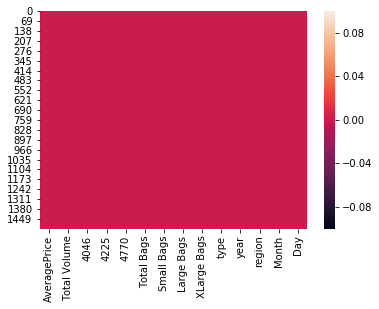

In [13]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# Great its showing no missing values

In [14]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [15]:
# Lets see the descriptive statistics
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [16]:
#Lets see the correlation among the different features as well as with target
df.corr()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


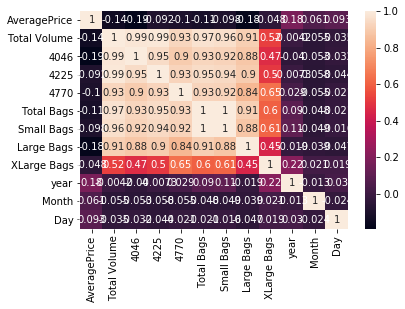

In [17]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007C07835DA0>,
      dtype=object)

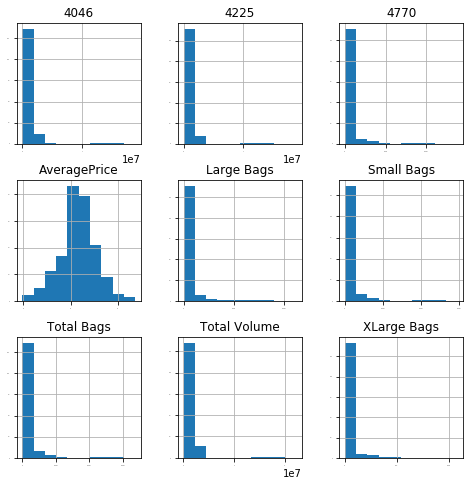

In [18]:
#Lets visualize distribution of numeric data
df.iloc[:,0:9].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(8,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007C08E38320>,
      dtype=object)

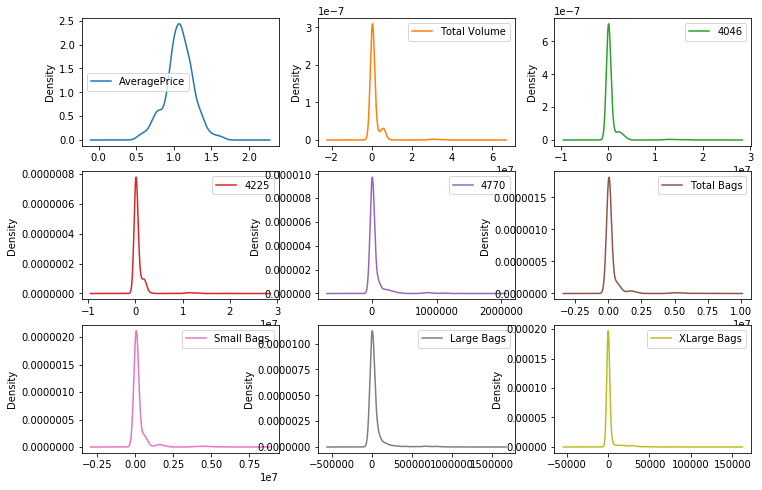

In [19]:
# # Univariate Density Plots of all numeric variables
df.iloc[:,0:9].plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))

In [20]:
#Lets see how many distinct years are there and there value counts
df['year'].value_counts()
#there are 2 years only 2015 and 2016
# we can create dummy encoding of them, which we will do later

2015    1270
2016     247
Name: year, dtype: int64

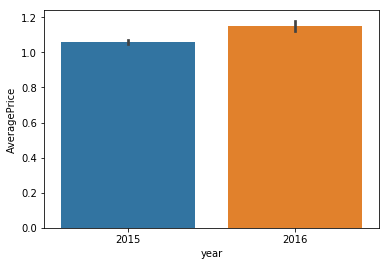

In [21]:
#Lets see the relation between AVERAGE PRICE on the basis of year
sns.barplot(x='year', y='AveragePrice', data=df)
# the average price in 2016 is more than 2015

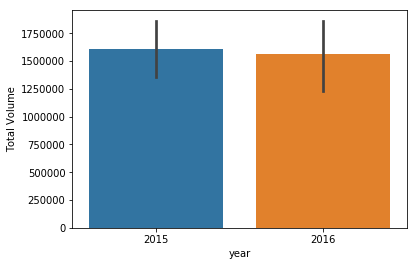

In [22]:
#Lets see the relation between TotalVolume sold and year

sns.barplot(x='year', y='Total Volume', data=df)
# the total sales is quit similar in both years but slightly more in 2015

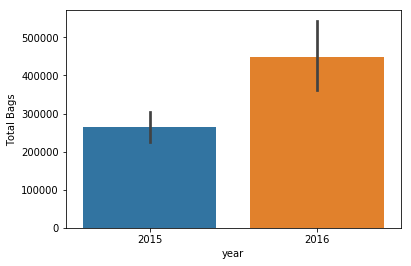

In [23]:
#Lets see the relation between Total Bags and year
sns.barplot(x='year', y='Total Bags', data=df)
# Interesting, we can clearly see more number of bag were sold in 2016
# But in year 2015 more number of avocado were sold as seen above

In [24]:
#Lets see the how many many different regions are there
df['region'].nunique()
#51 different regions are there

51

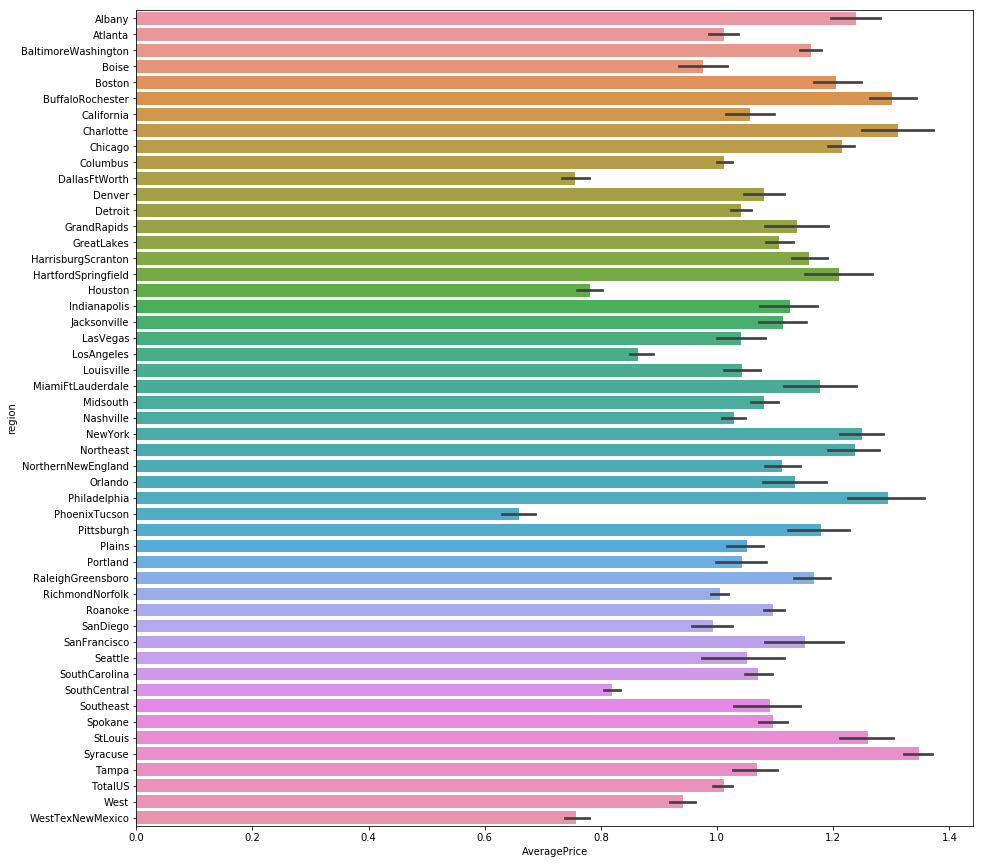

In [25]:
#Lets see the relation between AVERAGE PRICE and REGION
plt.figure(figsize=(15,15))
sns.barplot(x='AveragePrice', y='region', data=df)
# in few regions the average price is more than the others

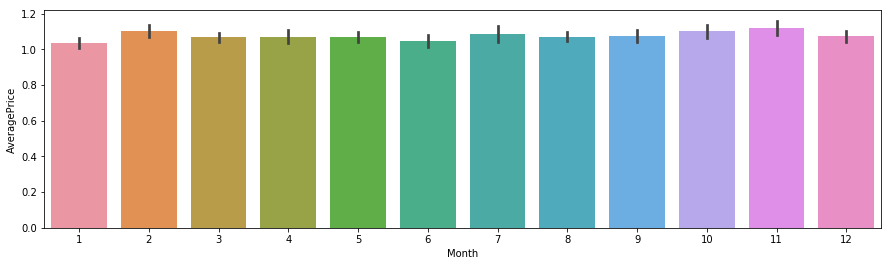

In [26]:
#Lets see the relation between AVERAGE PRICE and Month
plt.figure(figsize=(15,4))
sns.barplot(x='Month', y='AveragePrice', data=df)
# not much conclusion we can make from this plot

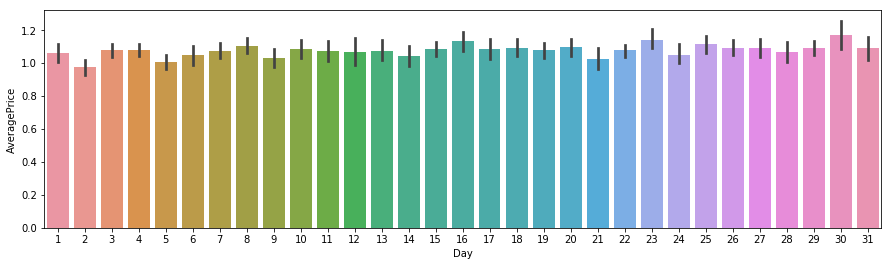

In [27]:
#Lets see the relation between AVERAGE PRICE and Day
plt.figure(figsize=(15,4))
sns.barplot(x='Day', y='AveragePrice', data=df)

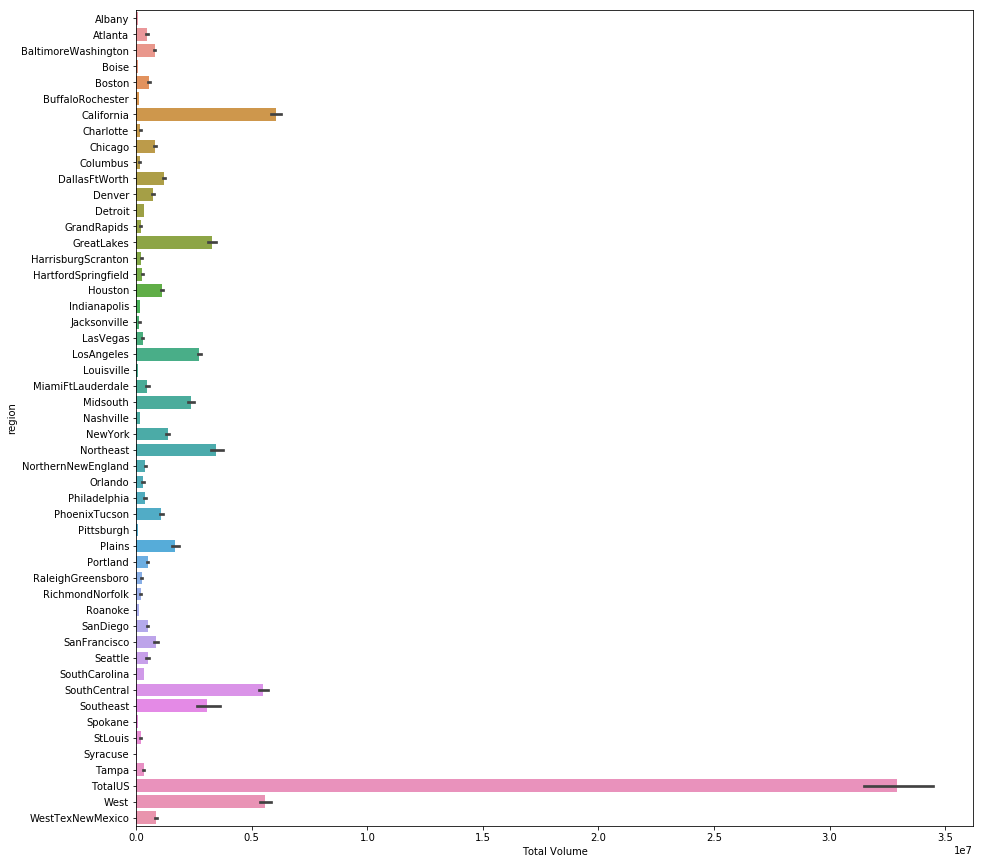

In [28]:
#Lets see the relation between Total Volume Sold VS REGION
plt.figure(figsize=(15,15))
sns.barplot( x='Total Volume',y='region',data=df)
# we can see that total volume sold in one region is way higher than others

In [29]:
#Lets check the how many unique values are there
df['type'].nunique()
#there is only one unique value there
# Its not useful for building model as its variance will be o


1

In [30]:
#Lets check its variable to confirm its variance
df['type'].var
# It has variance of 0


<bound method Series.var of 0       conventional
1       conventional
2       conventional
3       conventional
4       conventional
5       conventional
6       conventional
7       conventional
8       conventional
9       conventional
10      conventional
11      conventional
12      conventional
13      conventional
14      conventional
15      conventional
16      conventional
17      conventional
18      conventional
19      conventional
20      conventional
21      conventional
22      conventional
23      conventional
24      conventional
25      conventional
26      conventional
27      conventional
28      conventional
29      conventional
            ...     
1487    conventional
1488    conventional
1489    conventional
1490    conventional
1491    conventional
1492    conventional
1493    conventional
1494    conventional
1495    conventional
1496    conventional
1497    conventional
1498    conventional
1499    conventional
1500    conventional
1501    conventional
1502  

In [31]:
# so lets drop it as it wont help in building the model
df.drop('type',axis=1,inplace=True)


In [32]:
# lets confirm that type variable is dropped
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29


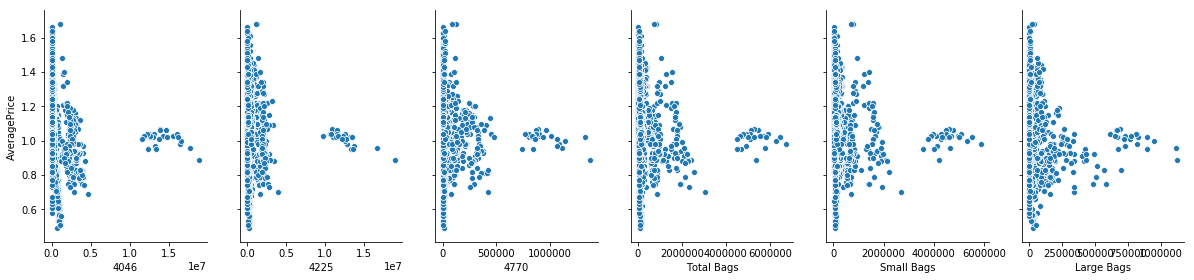

In [33]:
#Lets visulaize the relation between  average price and other numeric variables variables
sns.pairplot(df,x_vars=['4046','4225','4770','Total Bags','Small Bags','Large Bags'], size=4, aspect=0.7,y_vars='AveragePrice')

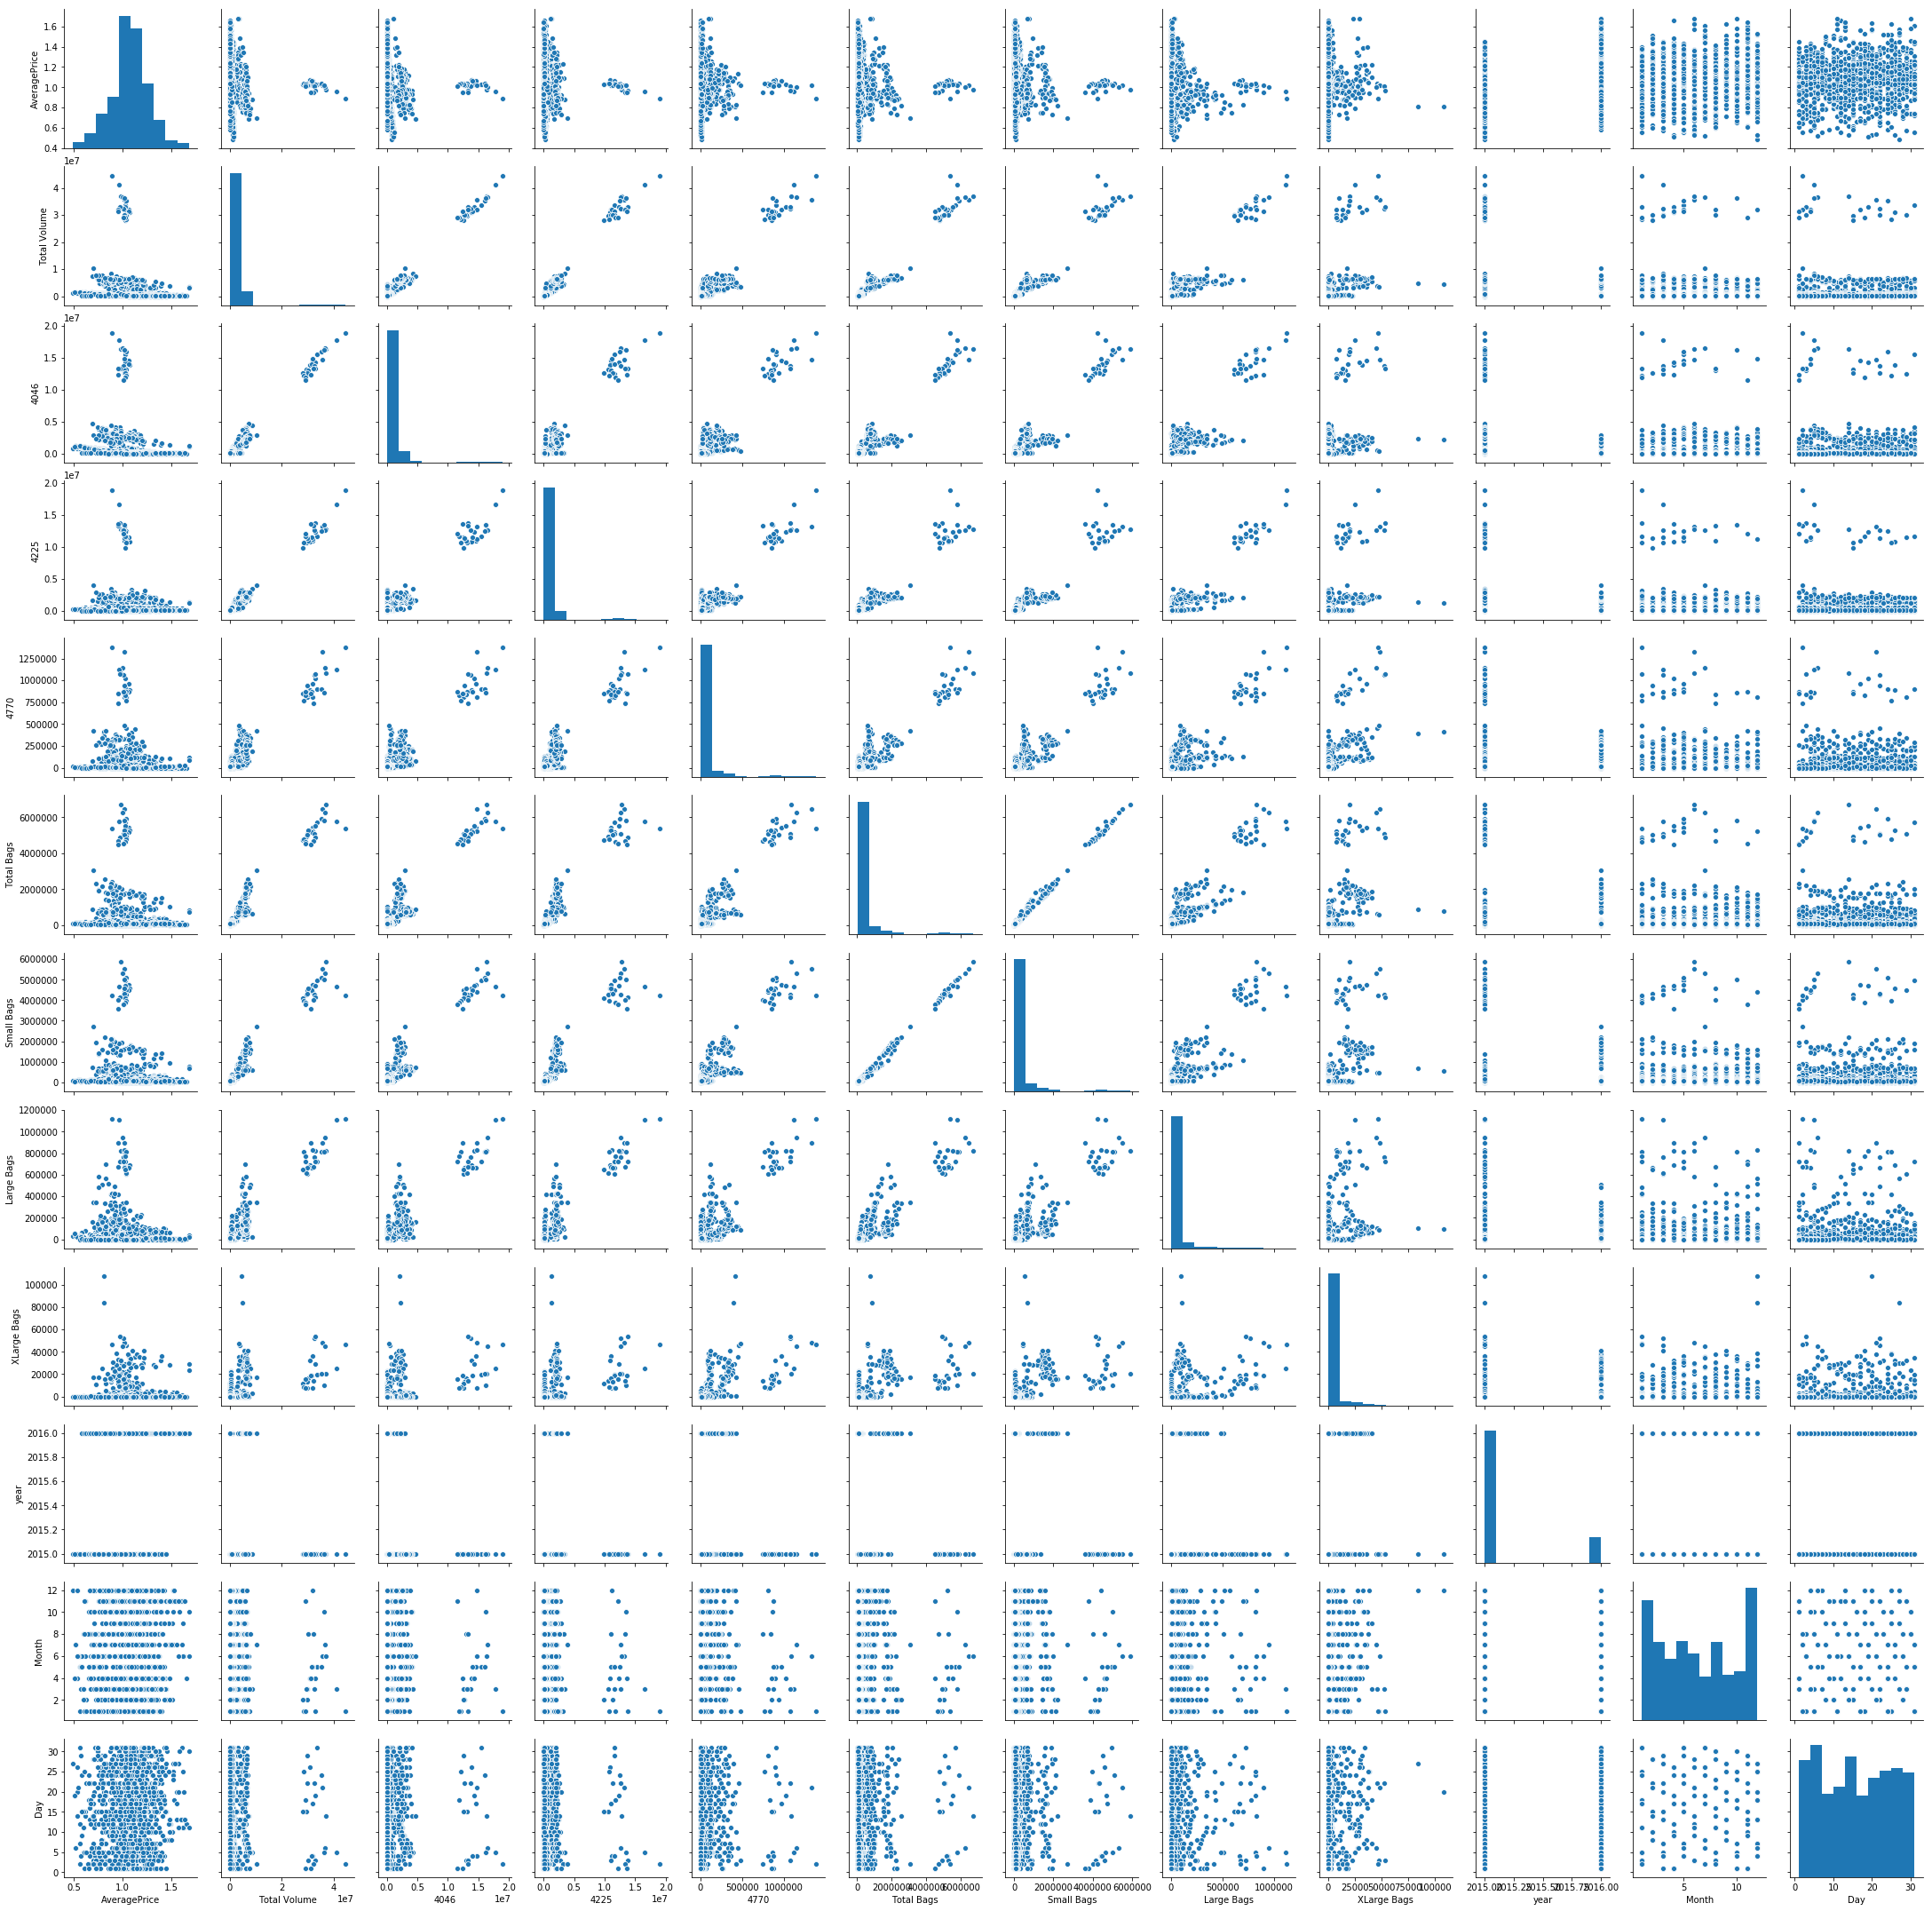

In [34]:
#Lets explore the relation b/w all variables
sns.pairplot(df)

In [35]:
# Lets do the dummy encoding of year column
year = pd.get_dummies(df['year'],drop_first=True,prefix='year')

In [36]:
# As new dummy variables have been created for mentioned variables we dont need them
df.drop('year',axis=1,inplace=True)

In [37]:
#Lets create new dataframe
dfnew = pd.concat([df,year],axis=1)

In [38]:
#Lets check its first five rows
dfnew.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day,year_2016
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,6,12,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,11,29,0


In [39]:
#Lets create a copy of dataframe which we will use later for Classification
dfc = dfnew.copy()

In [40]:
#Lets check dfc
dfc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day,year_2016
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,6,12,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,11,29,0


# Objective 1 : Regression: PREDICT THE AVERAGE PRICE

In [41]:
# As there are 51 different regions, lets assign them categories
# We are diving them into two categories
# 1. Where Average price is More than average price
# 2. Where Average price is less than or equal to average price
#Lets find what is average price
dfnew['AveragePrice'].mean()

1.0749901120632825

In [42]:
# Lets create a new column  for categorizing regions as per average price
dfnew['new_reg'] =dfnew['AveragePrice'].apply(lambda x: 'High' if x>dfnew['AveragePrice'].mean() else 'nothigh')

In [43]:
#Lets check weather the column has been included
dfnew.head()
#Great it has been included

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day,year_2016,new_reg
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,12,27,0,High
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,12,20,0,High
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,12,13,0,nothigh
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,6,12,0,High
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,11,29,0,High


In [44]:
# Lets drop the region column now as the information we wanted has been derived into new_reg column
dfnew.drop('region',axis=1,inplace=True)

In [45]:
#Lets confirm the drop
dfnew.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Day,year_2016,new_reg
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,12,27,0,High
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,12,20,0,High
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,12,13,0,nothigh
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,6,12,0,High
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,11,29,0,High


In [46]:
# Lets create dummy variables for new_reg
reg = pd.get_dummies(dfnew['new_reg'],drop_first=True,prefix='region')

In [47]:
# As new dummy variables have been created for mentioned variables we dont need them
dfnew.drop('new_reg',axis=1,inplace=True)

In [48]:
#Lets create new dataframe
dffinal= pd.concat([dfnew,reg],axis=1)

In [49]:
#Lets check final df
dffinal.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Day,year_2016,region_nothigh
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,12,27,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,12,20,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,12,13,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,6,12,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,11,29,0,0


In [50]:
#Lets check the skewness of numeric data
dffinal.skew()
#there is some positive skewness in newspaper ad which not in acceptable range

AveragePrice     -0.109444
Total Volume      6.200138
4046              6.051830
4225              6.394926
4770              5.405164
Total Bags        5.366378
Small Bags        5.355185
Large Bags        5.144495
XLarge Bags       5.775077
Month             0.101439
Day               0.041303
year_2016         1.828332
region_nothigh    0.059413
dtype: float64

In [51]:
# Let us reduce the Skewness with log as it is postively skewed
for col in dffinal.columns:                                      
    if ((dffinal.skew().loc[col]>0.55) or  (dffinal.skew().loc[col]<-0.55)): 
        dffinal[col]=np.log1p(dffinal[col])
        

In [52]:
#Lets check skewness in data
dffinal.skew()
# great, skewness has been reduced in various variables but some skewness is still available as it was too high so lets move ahead

AveragePrice     -0.109444
Total Volume      0.667468
4046             -0.160268
4225              0.184436
4770             -0.355508
Total Bags        0.695502
Small Bags        0.713843
Large Bags       -0.912766
XLarge Bags       0.783913
Month             0.101439
Day               0.041303
year_2016         1.828332
region_nothigh    0.059413
dtype: float64

In [53]:
#Lets reduce negative skewness
for col in dffinal.columns:                                      
    if (dffinal.skew().loc[col]<-0.55): 
        dffinal[col]=np.power(dffinal[col],2)

In [54]:
#Lets check skewness in data again
dffinal.skew()

AveragePrice     -0.109444
Total Volume      0.667468
4046             -0.160268
4225              0.184436
4770             -0.355508
Total Bags        0.695502
Small Bags        0.713843
Large Bags        0.166210
XLarge Bags       0.783913
Month             0.101439
Day               0.041303
year_2016         1.828332
region_nothigh    0.059413
dtype: float64

In [55]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(dffinal))
dfx = dffinal.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', dffinal.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
#There were few outliers which have been removed

The shape of original dataframe was = (1517, 13)
The shape of dataframe after removing outliers is = (1502, 13)


In [56]:
# Let us seperate the features and Target
x=dfx.drop('AveragePrice', axis=1)   
y=dfx[['AveragePrice']]

In [57]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Day,year_2016,region_nothigh
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,20.665669,0.0,12,27,0.0,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,21.067687,0.0,12,20,0.0,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,21.582864,0.0,12,13,0.0,1
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,24.044267,0.0,6,12,0.0,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,28.002574,0.0,11,29,0.0,0


In [58]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [59]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline



In [60]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso())])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))




In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -0.014360 (0.007946)
Lasso: -0.036192 (0.021403)
Ridge: -0.014333 (0.007989)
EN: -0.036192 (0.021403)
DT: -0.018118 (0.014007)
SVR: -0.016342 (0.014403)
KNN: -0.020191 (0.021508)


In [63]:
#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.502621 (0.110608)
Lasso: -0.215432 (0.157667)
Ridge: 0.505050 (0.108498)
EN: -0.215432 (0.157667)
DT: 0.349574 (0.301553)
SVR: 0.476309 (0.235342)
KNN: 0.372565 (0.387044)


In [64]:
Comparison = pd.DataFrame({'ModelName':names1,'R2_score': results,'NMSE':results1})
Comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,Ridge,0.505050,-0.014333
0,LR,0.502621,-0.014360
5,SVR,0.476309,-0.016342
6,KNN,0.372565,-0.020191
4,DT,0.349574,-0.018118
1,Lasso,-0.215432,-0.036192
3,EN,-0.215432,-0.036192


In [65]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

ensemble = [('RF', RandomForestRegressor(random_state=5)),('ADR',AdaBoostRegressor(random_state=5)),('GBR',GradientBoostingRegressor(random_state=5))]
results2 = []
names2 = []
for name, model in ensemble: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, x, y, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2.mean()) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)                                              


RF: -0.012496 (0.008804)
ADR: -0.011233 (0.006188)
GBR: -0.013734 (0.010604)


In [67]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in ensemble: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, x, y, cv=kfold3, scoring='r2') 
    results3.append(cv_results3.mean()) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.554876 (0.185097)
ADR: 0.590725 (0.151494)
GBR: 0.536684 (0.193797)


In [68]:
Comparison2 = pd.DataFrame({'ModelName':names2,'R2_score': results3,'NMSE':results2})
Comparison2.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
1,ADR,0.590725,-0.011233
0,RF,0.554876,-0.012496
2,GBR,0.536684,-0.013734


In [69]:
final_comparison =pd.concat([Comparison,Comparison2])

In [70]:
final_comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
1,ADR,0.590725,-0.011233
0,RF,0.554876,-0.012496
2,GBR,0.536684,-0.013734
2,Ridge,0.505050,-0.014333
0,LR,0.502621,-0.014360
5,SVR,0.476309,-0.016342
6,KNN,0.372565,-0.020191
4,DT,0.349574,-0.018118
1,Lasso,-0.215432,-0.036192
3,EN,-0.215432,-0.036192


In [71]:
#Lets try to check if  cross val performance of Adaboost can be improved can be increased by changing parameters
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=10, random_state=1) 
n_estimators = [50, 100, 150, 200,250,300]
learning_rate= [0.01,0.05,0.1,0.3,1]
             
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
mod = AdaBoostRegressor(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='r2', cv=kfoldx,n_jobs=-1)
grid_result = grid.fit(x, y)

In [72]:
#Lets check what best r2 score we can get
grid_result.best_score_
#Good to see that mean cross val has been increased

0.62270091857469

In [73]:
#lets see what are the best parameters
grid_result.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [74]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [75]:
#Lets find out the best random state for selected Adaptive boosting regressor in terms of highest r2 score
# By default adaptive boosting uses decision tree as base estimator
# scaled features are not neccesary for  non-distance based algo

max_r2=0
ad= AdaBoostRegressor(random_state=5,learning_rate=0.1,n_estimators=150)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    ad.fit(X_train,y_train)
    ypreds=ad.predict(X_test)
    r2_scr=r2_score(y_test, ypreds)
    print('At random state ', i, 'the value of r2_score is ', r2_scr)
    if r2_scr>max_r2:
        max_r2=r2_scr
        finalstate=i
print()
print()
print('max r2 score is', max_r2,'at random state' , finalstate)

At random state  1 the value of r2_score is  0.8161880693236087
At random state  2 the value of r2_score is  0.7580222222002131
At random state  3 the value of r2_score is  0.7724225592561315
At random state  4 the value of r2_score is  0.7693920006284541
At random state  5 the value of r2_score is  0.7826289054155571
At random state  6 the value of r2_score is  0.8139015917704994
At random state  7 the value of r2_score is  0.7904257300208548
At random state  8 the value of r2_score is  0.7910811936943647
At random state  9 the value of r2_score is  0.7905710490503399
At random state  10 the value of r2_score is  0.7957086936965307
At random state  11 the value of r2_score is  0.7623790650014275
At random state  12 the value of r2_score is  0.7964754404639995
At random state  13 the value of r2_score is  0.7840963128181515
At random state  14 the value of r2_score is  0.7377071475993207
At random state  15 the value of r2_score is  0.7562966530719814
At random state  16 the value of r

In [76]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 68)
adr= AdaBoostRegressor(random_state=5,learning_rate=0.1,n_estimators=150)
adr.fit(X_train,y_train)
ypred=adr.predict(X_test)
r2_scr=r2_score(y_test, ypred)
mse=mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
mae= mean_absolute_error(y_test, ypred)
print('r2_score is', r2_scr)
print('mse is', mse)
print('rmse is', rmse)
print('mae is', mae)

r2_score is 0.8261499129948826
mse is 0.006931826901297887
rmse is 0.08325759365546116
mae is 0.06677283079946733


In [77]:
#Lets once again verify its r2 cross val score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(AdaBoostRegressor(random_state=5,learning_rate=0.1,n_estimators=150),x,y,cv=kfoldx,scoring="r2").mean()

0.6226580114126815

In [78]:
#Lets see its neg mean square error  cross val score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(AdaBoostRegressor(random_state=5,learning_rate=0.1,n_estimators=150),x,y,cv=kfoldx,scoring="neg_mean_squared_error").mean()


-0.010657483623872557

In [79]:
# Lets save the predicted result to a csv file
dfx = pd.DataFrame(ypred)
dfx.to_csv('ADR_price_prediction.csv')

In [80]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(adr,'adr_price.pkl')

['adr_price.pkl']

# Objective 2: Predict the Region , It is a classification Problem

In [81]:
#Lets see data again
dfc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day,year_2016
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,6,12,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,11,29,0


In [82]:
#Lets check its shape
dfc.shape

(1517, 13)

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfc['region'] = le.fit_transform(dfc['region'])

In [84]:
#Lets check the tail of the data
dfc.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Day,year_2016
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,10,16,1
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,9,10,1
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,2,10,1
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,9,25,1
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,7,9,18,1


In [85]:
#Lets check the unique values in region
dfc['region'].nunique()

51

In [86]:
#Lets check the skewness
dfc.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
Month           0.101439
Day             0.041303
year_2016       1.828332
dtype: float64

In [87]:
# Let us reduce the Skewness with log as it is postively skewed
for col in dfc.columns:                                      
    if dfc.skew().loc[col]>0.55: 
        dfc[col]=np.log1p(dfc[col])
#Although skewness has come down but in some variables it was too high prior to working on skewness so could not come down below 0.55

In [88]:
#Lets check the skewness again
dfc.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
region          0.288146
Month           0.101439
Day             0.041303
year_2016       1.828332
dtype: float64

In [89]:
# Let us reduce the  negative Skewness 
for col in dfc.columns:                                      
    if dfc.skew().loc[col]<-0.55: 
        dfc[col]=np.power(dfc[col],2)

In [90]:
#Lets check the skewness again
dfc.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags      0.166210
XLarge Bags     0.783913
region          0.288146
Month           0.101439
Day             0.041303
year_2016       1.828332
dtype: float64

In [91]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(dfc))
dfcn = dfc.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', dfc.shape)
print('The shape of dataframe after removing outliers is =', dfcn.shape)
#There were few outliers which have been removed

The shape of original dataframe was = (1517, 13)
The shape of dataframe after removing outliers is = (1502, 13)


In [92]:
#Lets seperate target and features
xa = dfcn.drop(['region'],axis=1)
ya=dfcn[['region']]

In [93]:
#Lets check the first five rows of features
xa.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Day,year_2016
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,20.665669,0.0,12,27,0.0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,21.067687,0.0,12,20,0.0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,21.582864,0.0,12,13,0.0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,24.044267,0.0,6,12,0.0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,28.002574,0.0,11,29,0.0


In [94]:
#Lets check shape of feature
xa.shape

(1502, 12)

In [95]:
#Lets check the first five rows of target
ya.head()

,region
0,0
1,0
2,0
3,0
4,0


In [98]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [99]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
mypipelines = []
mypipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
mypipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
mypipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
mypipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
mypipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
mypipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

cvresults = []
cvnames = []
for name, model in mypipelines:
    mycv_results = cross_val_score(model, xa, ya, cv=10, scoring='accuracy')
    cvresults.append(mycv_results.mean())
    cvnames.append(name)
    mymsg = "%s: %f (%f)" % (name, mycv_results.mean(), mycv_results.std())
    print(mymsg)

LR: 0.805444 (0.047696)
LDA: 0.911215 (0.033837)
KNN: 0.869553 (0.022029)
CART: 0.853394 (0.048991)
NB: 0.870767 (0.075500)
SVM: 0.902600 (0.034995)


In [100]:
Comparisonc = pd.DataFrame({'ModelName':cvnames,'cross_val_accuracy': cvresults})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
1,LDA,0.911215
5,SVM,0.902600
4,NB,0.870767
2,KNN,0.869553
3,CART,0.853394
0,LR,0.805444


In [101]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy
# by default they work on decision  tree so scaling is not required
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
myensemble = [('RF', RandomForestClassifier(random_state=5)),('ADC',AdaBoostClassifier(random_state=5)),('GBC',GradientBoostingClassifier(random_state=5))]
myresults1 = []
mynames1 = []
for name, model in myensemble: 
    mycv_results1 = cross_val_score(model, xa, ya, cv=10, scoring='accuracy') 
    myresults1.append(mycv_results1.mean()) 
    mynames1.append(name) 
    mymsg1 = "%s: %f (%f)" % (name, mycv_results1.mean(), mycv_results1.std())
    print(mymsg1)  


RF: 0.936114 (0.027192)
ADC: 0.103985 (0.036848)
GBC: 0.888032 (0.036798)


In [102]:
Comparisoncn = pd.DataFrame({'ModelName':mynames1,'cross_val_accuracy':myresults1})
Comparisoncn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
0,RF,0.936114
2,GBC,0.888032
1,ADC,0.103985


In [103]:
#Lets see the final comparison of all algorithims
finalcomp = pd.concat([Comparisonc,Comparisoncn])
finalcomp.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
0,RF,0.936114
1,LDA,0.911215
5,SVM,0.902600
2,GBC,0.888032
4,NB,0.870767
2,KNN,0.869553
3,CART,0.853394
0,LR,0.805444
1,ADC,0.103985


In [104]:
#Lets try to check if  cross val performance of Random Forest can be improved can be increased by changing parameters
from sklearn.model_selection import GridSearchCV
mymod =RandomForestClassifier(random_state=5)
param_grid = {
    'bootstrap': [True,False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3,4],
    'min_samples_split': [2, 3, 4,5],
    'n_estimators': [100, 200, 300, 400,500]
} 
         

mygrid = GridSearchCV(estimator=mymod, param_grid=param_grid, scoring='accuracy', cv=10,n_jobs=-1)
mygrid_result = mygrid.fit(xa, ya)

In [105]:
#Lets see whats the best cross vale score
mygrid_result.best_score_
# we can see that its cross val accuracy has been increased from 0.936114 to 0.9600532623169108

0.9600532623169108

In [106]:
#Lets find out the best parameters
mygrid_result.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [107]:
#Lets find out the best random state for selected Random Forest
#By default RF works on Decision tree which is not a distance based algo
# scaling is not mandatory
from sklearn.model_selection import train_test_split
max_accuracy=0
rft=RandomForestClassifier(random_state=5, bootstrap=True,max_features='auto',min_samples_leaf=1,min_samples_split=3,n_estimators=100)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(xa, ya,test_size=0.2, random_state=i)
    rft.fit(X_train,y_train)
    Ypreds=rft.predict(X_test)
    accuracy_t=accuracy_score(y_test, Ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy_t)
    if accuracy_t>max_accuracy:
        max_accuracy=accuracy_t
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.9667774086378738
At random state  2 the value of accuracy is  0.9800664451827242
At random state  3 the value of accuracy is  0.9767441860465116
At random state  4 the value of accuracy is  0.9700996677740864
At random state  5 the value of accuracy is  0.9767441860465116
At random state  6 the value of accuracy is  0.9800664451827242
At random state  7 the value of accuracy is  0.9501661129568106
At random state  8 the value of accuracy is  0.9401993355481728
At random state  9 the value of accuracy is  0.9900332225913622
At random state  10 the value of accuracy is  0.9534883720930233
At random state  11 the value of accuracy is  0.9667774086378738
At random state  12 the value of accuracy is  0.9601328903654485
At random state  13 the value of accuracy is  0.9833887043189369
At random state  14 the value of accuracy is  0.9601328903654485
At random state  15 the value of accuracy is  0.973421926910299
At random state  16 the value of ac

In [108]:
#Lets once again verify its cross val accuracy

cross_val_score(RandomForestClassifier(random_state=5, bootstrap=True,max_features='auto',min_samples_leaf=1,min_samples_split=3,n_estimators=100),xa,ya,cv=10,scoring='accuracy').mean()

0.9607267806957361

In [109]:
#Lets build the final model using best random state
rf = RandomForestClassifier(random_state=5, bootstrap=True,max_features='auto',min_samples_leaf=1,min_samples_split=3,n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(xa, ya,test_size=0.2, random_state=9)
rf.fit(X_train,y_train)
Ypred=rf.predict(X_test)
accuracy=accuracy_score(y_test, Ypred)
print('accuracy is', accuracy)

accuracy is 0.9900332225913622


In [110]:
# Lets save the predicted result to a csv file
dfa = pd.DataFrame(Ypred,columns=['Predicted_values'])
dfa.to_csv('rf_region_prediction.csv')

In [111]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,Ypred))

confusion matrix =  [[13  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  4]]


In [112]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,Ypred))

classification report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         2
  

In [113]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(rf,'rf_region.pkl')

['rf_region.pkl']